In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [3]:
print('Image Data Shape',digits.data.shape)
print('Label Data Shape',digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


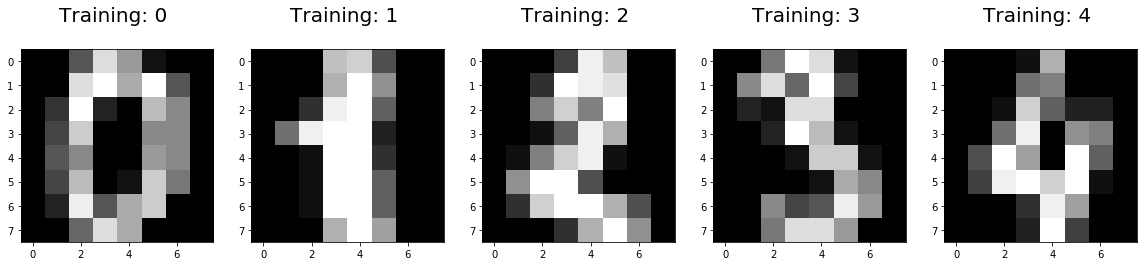

In [10]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i \n' % label,fontsize=20)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3,random_state=2)

In [12]:
print(x_train.shape)

(1257, 64)


In [13]:
print(y_train.shape)

(1257,)


In [14]:
print(x_test.shape)

(540, 64)


In [15]:
print(y_test.shape)

(540,)


In [17]:
logisticRegr=LogisticRegression()

In [18]:
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [21]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 9, 7, 1, 5, 1, 6])

In [22]:
predictions=logisticRegr.predict(x_test)

In [23]:
score=logisticRegr.score(x_test,y_test)

In [24]:
print(score)

0.9444444444444444


In [25]:
cm=metrics.confusion_matrix(y_test,predictions)

In [26]:
print(cm)

[[54  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  1  0  0  0  0  3  1]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  2  0  2  1  1]
 [ 0  2  0  0 49  0  0  0  0  2]
 [ 0  0  0  0  0 56  0  1  0  2]
 [ 0  0  0  0  0  0 55  0  1  0]
 [ 0  0  0  0  0  0  0 54  1  0]
 [ 0  5  0  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  3 40]]


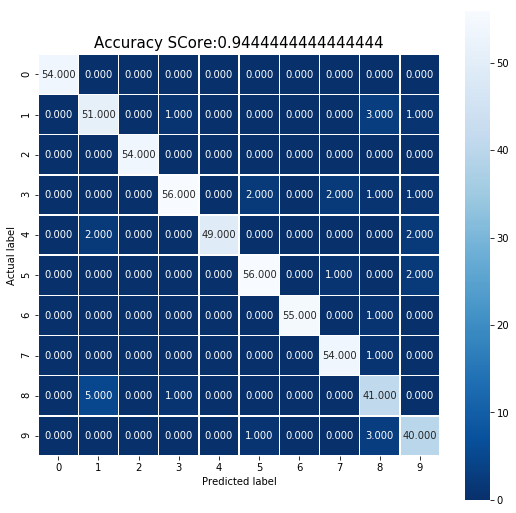

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy SCore:{0}'.format(score)
plt.title(all_sample_title,size=15);

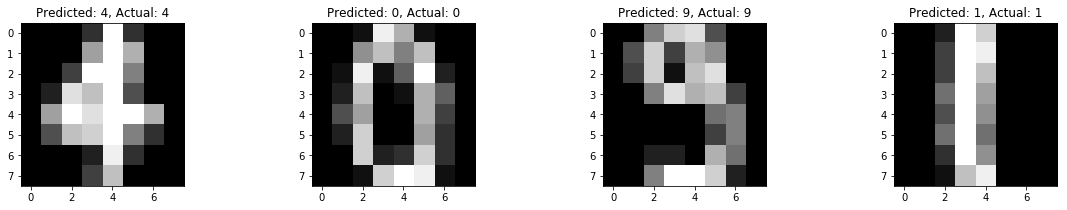

In [31]:
index=0
classifiedIndex=[]
for predict,actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
        index+=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong],y_test[wrong],fontsize=20))